In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import requests
import json
from time import sleep,time
import datetime
import csv
%matplotlib inline

next=time()
df=pd.read_csv("coronavirus_2021q1_all.csv")
df["Publish Date"]=df["Publish Date"].apply(lambda x: datetime.datetime.timestamp(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")))
df=df[df["Publish Date"]>datetime.datetime.timestamp(datetime.datetime(2021, 3, 1, 0))]
print(f"{len(pd.unique(df['Author']))} Unique users")
df

25895 Unique users


,Post ID,Subreddit,Body,Author,Score,Publish Date,Permalink,Parent_id,Post_id
424171,gpf898t,Coronavirus,I had the exact same thing happen. Got banned ...,Mutiny32,1,1.614699e+09,/r/Coronavirus/comments/lvsxtz/twitter_to_star...,t1_gpe19y1,t3_lvsxtz
424172,gpf899n,Coronavirus,Your post or comment has been removed because ...,fractalfrog,1,1.614699e+09,/r/Coronavirus/comments/lvoegt/massachusetts_r...,t1_gpduxfj,t3_lvoegt
424173,gpf89zm,Coronavirus,Hindsight it might have been better to roll ou...,Ridikiscali,1,1.614699e+09,/r/Coronavirus/comments/lw0ecl/fauci_us_must_s...,t3_lw0ecl,t3_lw0ecl
424174,gpf8a2c,Coronavirus,Omg I'm so glad we just canceled ours,Oddrenaline,1,1.614699e+09,/r/Coronavirus/comments/lvwwsx/daily_discussio...,t1_gpf7lez,t3_lvwwsx
424175,gpf8a5o,Coronavirus,Do you mean the people that want the new norma...,rwhelan,1,1.614699e+09,/r/Coronavirus/comments/lvp8hi/alabama_plannin...,t1_gpdmd5r,t3_lvp8hi
...,...,...,...,...,...,...,...,...,...
548295,gsqvr40,Coronavirus,Sometimes you just have to force it down their...,redmustang04,1,1.617062e+09,/r/Coronavirus/comments/mfus44/biden_to_say_90...,t1_gspmeo9,t3_mfus44
548296,gsqvr4x,Coronavirus,I know in some states they’ve also opened up t...,socialistrob,1,1.617062e+09,/r/Coronavirus/comments/mfus44/biden_to_say_90...,t1_gsqqbgm,t3_mfus44
548297,gsqvrau,Coronavirus,Sometimes you just have to force it down their...,redmustang04,1,1.617062e+09,/r/Coronavirus/comments/mfus44/biden_to_say_90...,t3_mfus44,t3_mfus44
548298,gsqvrpl,Coronavirus,We weren’t dealing with the absence of evidenc...,boooooooooo_cowboys,1,1.617062e+09,/r/Coronavirus/comments/mfrkgy/pfizer_moderna_...,t1_gsqb50f,t3_mfrkgy


YourWebcam              804
lordhamster1977         782
fractalfrog             440
Worth-Enthusiasm-161    360
Viewfromthe31stfloor    358
                       ... 
ArthurBea                 1
k7eric                    1
chirpyboyandbartjr        1
Nick700                   1
StrungStringBeans         1
Name: Author, Length: 25893, dtype: int64

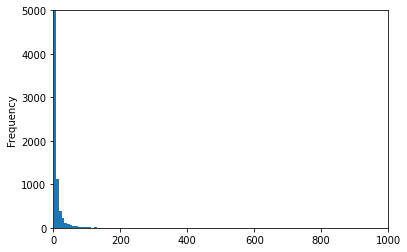

In [3]:
value_counts=df["Author"].value_counts()
value_counts=value_counts[value_counts<=3000]
value_counts.plot.hist(bins=100,ylim=(0,5000),xlim=(0,1000))

value_counts

<AxesSubplot:ylabel='Frequency'>

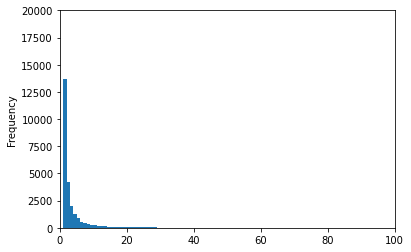

In [4]:
value_counts.plot.hist(bins=804,ylim=(0,20000),xlim=(0,100))

In [6]:
def getUserPushshiftData(after, before, query=None, sub="All",author=None):
    global next
    sleep(max(next-time(),0))
    url = f"https://api.pushshift.io/reddit/search/comment/?size=1000&after={str(after)}&before={before}{'' if query is None else '&query='+query}{'' if author is None else '&author='+author}"
    # print(url)
    next=time()+2
    while True:
        try:
            r = requests.get(url)
            data = json.loads(r.text)
            
            return data['data']
        except:
            print("Errored, retrying in 30s")
            sleep(30)

def collectSubData(subm):
    subData = list() #list to store data points
    body = subm['body'].replace('\n',' ').replace('\t',' ').replace('\r',' ').replace('\r\n',' ')
    author = subm['author']
    com_id = subm['id']
    score = subm['score']
    created = datetime.datetime.fromtimestamp(subm['created_utc']) #1520561700.0
    permalink = subm['permalink']
    subreddit = subm['subreddit']
    parent_id = subm['parent_id']
    post_id=subm['link_id']
    if subreddit!="Coronavirus":
        subData.append((com_id,subreddit,body,author,score,created,permalink,parent_id,post_id))
        subStats[com_id] = subData

In [7]:
value_counts=df["Author"].value_counts()
df=df[~df["Author"].isin(value_counts[value_counts>=2000].index)]

subStats = {}
subCount = 0


In [1]:
from time import time
totalusers=len(pd.unique(df["Author"]))
for i,user in enumerate(pd.unique(df["Author"])):
    userSubCount=0
    #before and after dates
    before = datetime.datetime(2021, 12, 31, 0)
    after = datetime.datetime(2021, 1, 1, 0)
    data = getUserPushshiftData(after, before, author=user)# Will run until all posts have been gathered 
    # from the 'after' date up until before date
    for submission in data:
        collectSubData(submission)
        userSubCount+=1

        # Calls getPushshiftData() with the created date of the last submission
        # print(len(data))
        # print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))

    print(f"{userSubCount} submissions have added to list for user {user}         ({i}/{totalusers})",end="\r")
        # print("1st entry is:")
        # print(list(subStats.values())[0][0][1] + " created: " + str(list(subStats.values())[0][0][5]))
        # print("Last entry is:")
        # print(list(subStats.values())[-1][0][1] + " created: " + str(list(subStats.values())[-1][0][5]))

NameError: name 'pd' is not defined

In [ ]:
import time
def updateSubs_file():
    upload_count = 0
    print("input filename of submission file, please add .csv")
    filename = input()
    file = filename
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        a = csv.writer(file, delimiter=',')
        headers = ["Post ID","Subreddit","Body","Author","Score","Publish Date","Permalink","Parent_id","Post_id"]
        a.writerow(headers)
        for sub in subStats:
            a.writerow(subStats[sub][0])
            upload_count+=1
            
        print(str(upload_count) + " submissions have been uploaded")

updateSubs_file()